In [ ]:
import copy
import json
import pprint
import time
from collections import defaultdict

import numpy as np
import seaborn as sns

import pathpyG as pp

printer = pprint.PrettyPrinter(indent=4)
pp.config['device'] = 'cpu'

In [2]:
def test_mo_scalability(g, exp):
    res = copy.deepcopy(exp)
    pp.config['device'] = exp['device']
    g.data.to(exp['device'])
    res['temp_net_nodes'] = g.n
    res['temp_net_edges'] = g.m
    res['temp_net_events'] = g.data.edge_index.size(1)

    start_time = time.time()
    eg = pp.algorithms.lift_order_temporal(g, delta=exp['delta'])
    eg.to(exp['device'])
    res['lift_event_graph_time'] = time.time() - start_time
    res['event_graph_edges'] = eg.size(1)

    start_time = time.time()
    m = pp.MultiOrderModel.from_temporal_graph(g, delta=exp['delta'], max_order=exp['max_order'])
    res['mo_time'] = time.time() - start_time
    res['max_order_nodes'] = m.layers[exp['max_order']].n
    res['max_order_edges'] = m.layers[exp['max_order']].m
    return res


In [3]:
results = defaultdict(lambda: defaultdict())
exp = {}

g = pp.io.read_netzschleuder_graph('copenhagen', 'sms', time_attr='timestamp')
print(g)
for d in ['cuda', 'cpu']:
    exp['device'] = d
    for delta in np.linspace(30, 3600, 5):
        exp['delta'] = delta
        for k in range(2, 6):
            exp['max_order'] = k
            try:
                res = test_mo_scalability(g, exp)
                printer.pprint(res)
                results[delta][k] = res
            except Exception as e:
                print(e)

with open('results_copenhagen.json', 'w') as f:
    json.dump(results, f)

Mapping node attributes based on node indices in column `index`
Temporal Graph with 568 nodes, 1303 unique edges and 24333 events in [18.0, 2418982.0]

Node attributes
	node_female		<class 'torch.Tensor'> -> torch.Size([568])
	node_id		<class 'torch.Tensor'> -> torch.Size([568])
	node__pos		<class 'numpy.ndarray'>

Edge attributes
	time		<class 'torch.Tensor'> -> torch.Size([24333])
	edge_index		<class 'torch_geometric.edge_index.EdgeIndex'>

Graph attributes
	analyses_edge_properties		<class 'list'>
	analyses_num_edges		<class 'int'>
	analyses_degree_assortativity		<class 'float'>
	analyses_mixing_time		<class 'float'>
	analyses_diameter		<class 'int'>
	analyses_largest_component_fraction		<class 'float'>
	analyses_is_directed		<class 'bool'>
	analyses_knn_proj_2		<class 'float'>
	analyses_num_vertices		<class 'int'>
	analyses_vertex_properties		<class 'list'>
	analyses_edge_reciprocity		<class 'float'>
	analyses_is_bipartite		<class 'bool'>
	analyses_knn_proj_1		<class 'float'>
	anal

100%|██████████| 24039/24039 [00:11<00:00, 2088.86it/s]


{   'delta': 30.0,
    'device': 'cuda',
    'event_graph_edges': 4394,
    'lift_event_graph_time': 11.122706413269043,
    'max_order': 2,
    'max_order_edges': 557,
    'max_order_nodes': 1303,
    'mo_time': 12.025795459747314,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:11<00:00, 2069.14it/s]


{   'delta': 30.0,
    'device': 'cuda',
    'event_graph_edges': 4394,
    'lift_event_graph_time': 11.795116186141968,
    'max_order': 3,
    'max_order_edges': 229,
    'max_order_nodes': 557,
    'mo_time': 11.878443956375122,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:11<00:00, 2011.84it/s]


{   'delta': 30.0,
    'device': 'cuda',
    'event_graph_edges': 4394,
    'lift_event_graph_time': 11.777009963989258,
    'max_order': 4,
    'max_order_edges': 110,
    'max_order_nodes': 229,
    'mo_time': 12.220279693603516,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:11<00:00, 2061.54it/s]


{   'delta': 30.0,
    'device': 'cuda',
    'event_graph_edges': 4394,
    'lift_event_graph_time': 11.595112562179565,
    'max_order': 5,
    'max_order_edges': 61,
    'max_order_nodes': 110,
    'mo_time': 12.093271017074585,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:21<00:00, 1130.39it/s]


{   'delta': 922.5,
    'device': 'cuda',
    'event_graph_edges': 54935,
    'lift_event_graph_time': 22.232107639312744,
    'max_order': 2,
    'max_order_edges': 1236,
    'max_order_nodes': 1303,
    'mo_time': 21.630196571350098,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:21<00:00, 1120.23it/s]


{   'delta': 922.5,
    'device': 'cuda',
    'event_graph_edges': 54935,
    'lift_event_graph_time': 21.974792957305908,
    'max_order': 3,
    'max_order_edges': 1122,
    'max_order_nodes': 1236,
    'mo_time': 22.22197437286377,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:21<00:00, 1109.25it/s]


{   'delta': 922.5,
    'device': 'cuda',
    'event_graph_edges': 54935,
    'lift_event_graph_time': 21.74143648147583,
    'max_order': 4,
    'max_order_edges': 1008,
    'max_order_nodes': 1122,
    'mo_time': 22.65464735031128,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:21<00:00, 1142.30it/s]


{   'delta': 922.5,
    'device': 'cuda',
    'event_graph_edges': 54935,
    'lift_event_graph_time': 22.076518774032593,
    'max_order': 5,
    'max_order_edges': 878,
    'max_order_nodes': 1008,
    'mo_time': 22.64402413368225,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:26<00:00, 896.10it/s] 


{   'delta': 1815.0,
    'device': 'cuda',
    'event_graph_edges': 77345,
    'lift_event_graph_time': 22.712382793426514,
    'max_order': 2,
    'max_order_edges': 1344,
    'max_order_nodes': 1303,
    'mo_time': 27.22113013267517,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:27<00:00, 889.93it/s] 


{   'delta': 1815.0,
    'device': 'cuda',
    'event_graph_edges': 77345,
    'lift_event_graph_time': 28.49084734916687,
    'max_order': 3,
    'max_order_edges': 1306,
    'max_order_nodes': 1344,
    'mo_time': 27.783222198486328,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:24<00:00, 966.13it/s] 


{   'delta': 1815.0,
    'device': 'cuda',
    'event_graph_edges': 77345,
    'lift_event_graph_time': 24.00903582572937,
    'max_order': 4,
    'max_order_edges': 1279,
    'max_order_nodes': 1306,
    'mo_time': 26.02214217185974,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:21<00:00, 1111.71it/s]


{   'delta': 1815.0,
    'device': 'cuda',
    'event_graph_edges': 77345,
    'lift_event_graph_time': 23.30103063583374,
    'max_order': 5,
    'max_order_edges': 1232,
    'max_order_nodes': 1279,
    'mo_time': 32.56914210319519,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:18<00:00, 1283.34it/s]


{   'delta': 2707.5,
    'device': 'cuda',
    'event_graph_edges': 92566,
    'lift_event_graph_time': 21.834106922149658,
    'max_order': 2,
    'max_order_edges': 1408,
    'max_order_nodes': 1303,
    'mo_time': 19.122129917144775,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:23<00:00, 1042.82it/s]


{   'delta': 2707.5,
    'device': 'cuda',
    'event_graph_edges': 92566,
    'lift_event_graph_time': 17.55621361732483,
    'max_order': 3,
    'max_order_edges': 1420,
    'max_order_nodes': 1408,
    'mo_time': 23.811742305755615,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:22<00:00, 1062.19it/s]


{   'delta': 2707.5,
    'device': 'cuda',
    'event_graph_edges': 92566,
    'lift_event_graph_time': 22.32985234260559,
    'max_order': 4,
    'max_order_edges': 1448,
    'max_order_nodes': 1420,
    'mo_time': 23.88112759590149,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:24<00:00, 976.45it/s] 


{   'delta': 2707.5,
    'device': 'cuda',
    'event_graph_edges': 92566,
    'lift_event_graph_time': 25.302610397338867,
    'max_order': 5,
    'max_order_edges': 1452,
    'max_order_nodes': 1448,
    'mo_time': 58.79792809486389,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:16<00:00, 1482.82it/s]


{   'delta': 3600.0,
    'device': 'cuda',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 21.1067316532135,
    'max_order': 2,
    'max_order_edges': 1453,
    'max_order_nodes': 1303,
    'mo_time': 16.5167076587677,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:18<00:00, 1323.43it/s]


{   'delta': 3600.0,
    'device': 'cuda',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 15.98039698600769,
    'max_order': 3,
    'max_order_edges': 1506,
    'max_order_nodes': 1453,
    'mo_time': 18.9002103805542,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:16<00:00, 1452.72it/s]


{   'delta': 3600.0,
    'device': 'cuda',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 16.622321605682373,
    'max_order': 4,
    'max_order_edges': 1594,
    'max_order_nodes': 1506,
    'mo_time': 17.679415464401245,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:15<00:00, 1547.80it/s]


{   'delta': 3600.0,
    'device': 'cuda',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 16.335521936416626,
    'max_order': 5,
    'max_order_edges': 1674,
    'max_order_nodes': 1594,
    'mo_time': 126.71205115318298,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:08<00:00, 2878.70it/s]


{   'delta': 30.0,
    'device': 'cpu',
    'event_graph_edges': 4394,
    'lift_event_graph_time': 8.384625434875488,
    'max_order': 2,
    'max_order_edges': 557,
    'max_order_nodes': 1303,
    'mo_time': 8.44395112991333,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:08<00:00, 2889.33it/s]


{   'delta': 30.0,
    'device': 'cpu',
    'event_graph_edges': 4394,
    'lift_event_graph_time': 8.201921463012695,
    'max_order': 3,
    'max_order_edges': 229,
    'max_order_nodes': 557,
    'mo_time': 8.436858654022217,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:08<00:00, 2908.75it/s]


{   'delta': 30.0,
    'device': 'cpu',
    'event_graph_edges': 4394,
    'lift_event_graph_time': 8.282766819000244,
    'max_order': 4,
    'max_order_edges': 110,
    'max_order_nodes': 229,
    'mo_time': 8.383979320526123,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:08<00:00, 2940.09it/s]


{   'delta': 30.0,
    'device': 'cpu',
    'event_graph_edges': 4394,
    'lift_event_graph_time': 8.31244707107544,
    'max_order': 5,
    'max_order_edges': 61,
    'max_order_nodes': 110,
    'mo_time': 8.297135353088379,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2379.18it/s]


{   'delta': 922.5,
    'device': 'cpu',
    'event_graph_edges': 54935,
    'lift_event_graph_time': 9.95227837562561,
    'max_order': 2,
    'max_order_edges': 1236,
    'max_order_nodes': 1303,
    'mo_time': 10.21712613105774,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2403.32it/s]


{   'delta': 922.5,
    'device': 'cpu',
    'event_graph_edges': 54935,
    'lift_event_graph_time': 10.163817644119263,
    'max_order': 3,
    'max_order_edges': 1122,
    'max_order_nodes': 1236,
    'mo_time': 10.227073669433594,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2388.56it/s]


{   'delta': 922.5,
    'device': 'cpu',
    'event_graph_edges': 54935,
    'lift_event_graph_time': 9.988727569580078,
    'max_order': 4,
    'max_order_edges': 1008,
    'max_order_nodes': 1122,
    'mo_time': 10.93671178817749,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2394.89it/s]


{   'delta': 922.5,
    'device': 'cpu',
    'event_graph_edges': 54935,
    'lift_event_graph_time': 10.032788515090942,
    'max_order': 5,
    'max_order_edges': 878,
    'max_order_nodes': 1008,
    'mo_time': 16.719266414642334,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2338.14it/s]


{   'delta': 1815.0,
    'device': 'cpu',
    'event_graph_edges': 77345,
    'lift_event_graph_time': 10.765197515487671,
    'max_order': 2,
    'max_order_edges': 1344,
    'max_order_nodes': 1303,
    'mo_time': 10.433187007904053,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2352.14it/s]


{   'delta': 1815.0,
    'device': 'cpu',
    'event_graph_edges': 77345,
    'lift_event_graph_time': 10.362721920013428,
    'max_order': 3,
    'max_order_edges': 1306,
    'max_order_nodes': 1344,
    'mo_time': 10.513421058654785,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2286.25it/s]


{   'delta': 1815.0,
    'device': 'cpu',
    'event_graph_edges': 77345,
    'lift_event_graph_time': 10.253392696380615,
    'max_order': 4,
    'max_order_edges': 1279,
    'max_order_nodes': 1306,
    'mo_time': 12.241335153579712,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2389.42it/s]


{   'delta': 1815.0,
    'device': 'cpu',
    'event_graph_edges': 77345,
    'lift_event_graph_time': 10.25893259048462,
    'max_order': 5,
    'max_order_edges': 1232,
    'max_order_nodes': 1279,
    'mo_time': 24.42807126045227,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2259.16it/s]


{   'delta': 2707.5,
    'device': 'cpu',
    'event_graph_edges': 92566,
    'lift_event_graph_time': 11.133711338043213,
    'max_order': 2,
    'max_order_edges': 1408,
    'max_order_nodes': 1303,
    'mo_time': 10.760009765625,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2265.84it/s]


{   'delta': 2707.5,
    'device': 'cpu',
    'event_graph_edges': 92566,
    'lift_event_graph_time': 10.470611095428467,
    'max_order': 3,
    'max_order_edges': 1420,
    'max_order_nodes': 1408,
    'mo_time': 10.977295637130737,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2345.28it/s]


{   'delta': 2707.5,
    'device': 'cpu',
    'event_graph_edges': 92566,
    'lift_event_graph_time': 10.43064832687378,
    'max_order': 4,
    'max_order_edges': 1448,
    'max_order_nodes': 1420,
    'mo_time': 12.300642490386963,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2333.72it/s]


{   'delta': 2707.5,
    'device': 'cpu',
    'event_graph_edges': 92566,
    'lift_event_graph_time': 10.682463884353638,
    'max_order': 5,
    'max_order_edges': 1452,
    'max_order_nodes': 1448,
    'mo_time': 36.225979804992676,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:11<00:00, 2125.78it/s]


{   'delta': 3600.0,
    'device': 'cpu',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 12.819502115249634,
    'max_order': 2,
    'max_order_edges': 1453,
    'max_order_nodes': 1303,
    'mo_time': 11.431120872497559,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2262.04it/s]


{   'delta': 3600.0,
    'device': 'cpu',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 10.74588942527771,
    'max_order': 3,
    'max_order_edges': 1506,
    'max_order_nodes': 1453,
    'mo_time': 10.993196725845337,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2266.47it/s]


{   'delta': 3600.0,
    'device': 'cpu',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 10.709041357040405,
    'max_order': 4,
    'max_order_edges': 1594,
    'max_order_nodes': 1506,
    'mo_time': 13.24429202079773,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


100%|██████████| 24039/24039 [00:10<00:00, 2248.93it/s]


{   'delta': 3600.0,
    'device': 'cpu',
    'event_graph_edges': 105280,
    'lift_event_graph_time': 10.85075306892395,
    'max_order': 5,
    'max_order_edges': 1674,
    'max_order_nodes': 1594,
    'mo_time': 63.68161463737488,
    'temp_net_edges': 24333,
    'temp_net_events': 24333,
    'temp_net_nodes': 568}


In [4]:
results_rm = defaultdict(lambda: defaultdict())
exp = {}

g = pp.io.read_netzschleuder_graph('reality_mining', time_attr='time')
print(g)
for d in ['cuda', 'cpu']:
    exp['device'] = d
    for delta in np.linspace(300, 3600, 5):
        exp['delta'] = delta
        for k in range(2, 6):
            exp['max_order'] = k
            try:
                res = test_mo_scalability(g, exp)
                printer.pprint(res)
                results_rm[delta][k] = res
            except Exception as e:
                print(e)

            with open('results_rm_realitymining.json', 'w') as f:
                json.dump(results_rm, f)

Mapping node attributes based on node indices in column `index`
Temporal Graph with 96 nodes, 5078 unique edges and 2172808 events in [1095183104.0, 1115253760.0]

Node attributes
	node__pos		<class 'numpy.ndarray'>

Edge attributes
	time		<class 'torch.Tensor'> -> torch.Size([2172808])
	edge_index		<class 'torch_geometric.edge_index.EdgeIndex'>

Graph attributes
	analyses_edge_properties		<class 'list'>
	analyses_num_edges		<class 'int'>
	analyses_degree_assortativity		<class 'float'>
	analyses_mixing_time		<class 'float'>
	analyses_diameter		<class 'int'>
	analyses_largest_component_fraction		<class 'float'>
	analyses_is_directed		<class 'bool'>
	analyses_knn_proj_2		<class 'float'>
	analyses_num_vertices		<class 'int'>
	analyses_vertex_properties		<class 'list'>
	analyses_edge_reciprocity		<class 'float'>
	analyses_is_bipartite		<class 'bool'>
	analyses_knn_proj_1		<class 'float'>
	analyses_transition_gap		<class 'float'>
	analyses_average_degree		<class 'float'>
	analyses_hashimoto

100%|██████████| 33452/33452 [02:05<00:00, 267.26it/s]


torch.cat(): expected a non-empty list of Tensors


100%|██████████| 33452/33452 [02:04<00:00, 268.49it/s]


torch.cat(): expected a non-empty list of Tensors


100%|██████████| 33452/33452 [02:04<00:00, 268.28it/s]


torch.cat(): expected a non-empty list of Tensors


100%|██████████| 33452/33452 [02:03<00:00, 270.22it/s]


torch.cat(): expected a non-empty list of Tensors


100%|██████████| 33452/33452 [03:35<00:00, 155.29it/s]


{   'delta': 1125.0,
    'device': 'cuda',
    'event_graph_edges': 55088257,
    'lift_event_graph_time': 217.30356216430664,
    'max_order': 2,
    'max_order_edges': 68938,
    'max_order_nodes': 5078,
    'mo_time': 243.20855259895325,
    'temp_net_edges': 2172808,
    'temp_net_events': 2172808,
    'temp_net_nodes': 96}


100%|██████████| 33452/33452 [03:34<00:00, 155.62it/s]


CUDA out of memory. Tried to allocate 13.03 GiB. GPU 0 has a total capacty of 4.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 16.23 GiB is allocated by PyTorch, and 576.01 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


100%|██████████| 33452/33452 [04:04<00:00, 137.04it/s]


CUDA out of memory. Tried to allocate 13.03 GiB. GPU 0 has a total capacty of 4.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 16.23 GiB is allocated by PyTorch, and 576.01 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


100%|██████████| 33452/33452 [04:04<00:00, 136.87it/s]


CUDA out of memory. Tried to allocate 13.03 GiB. GPU 0 has a total capacty of 4.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 16.23 GiB is allocated by PyTorch, and 576.01 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


100%|██████████| 33452/33452 [04:10<00:00, 133.48it/s]


{   'delta': 1950.0,
    'device': 'cuda',
    'event_graph_edges': 96946987,
    'lift_event_graph_time': 251.03341007232666,
    'max_order': 2,
    'max_order_edges': 74773,
    'max_order_nodes': 5078,
    'mo_time': 281.3313329219818,
    'temp_net_edges': 2172808,
    'temp_net_events': 2172808,
    'temp_net_nodes': 96}


100%|██████████| 33452/33452 [04:11<00:00, 133.02it/s]


CUDA out of memory. Tried to allocate 41.73 GiB. GPU 0 has a total capacty of 4.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 4.80 GiB is allocated by PyTorch, and 11.64 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


100%|██████████| 33452/33452 [49:33<00:00, 11.25it/s]  


CUDA out of memory. Tried to allocate 41.73 GiB. GPU 0 has a total capacty of 4.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 4.80 GiB is allocated by PyTorch, and 11.64 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


100%|██████████| 33452/33452 [49:35<00:00, 11.24it/s]  


CUDA out of memory. Tried to allocate 41.73 GiB. GPU 0 has a total capacty of 4.00 GiB of which 0 bytes is free. Including non-PyTorch memory, this process has 17179869184.00 GiB memory in use. Of the allocated memory 4.80 GiB is allocated by PyTorch, and 11.64 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF


100%|██████████| 33452/33452 [53:05<00:00, 10.50it/s]  


{   'delta': 2775.0,
    'device': 'cuda',
    'event_graph_edges': 124683153,
    'lift_event_graph_time': 3082.5759828090668,
    'max_order': 2,
    'max_order_edges': 77875,
    'max_order_nodes': 5078,
    'mo_time': 3224.959701538086,
    'temp_net_edges': 2172808,
    'temp_net_events': 2172808,
    'temp_net_nodes': 96}


 44%|████▎     | 14586/33452 [22:45<29:25, 10.68it/s]  


KeyboardInterrupt: 

<Axes: >

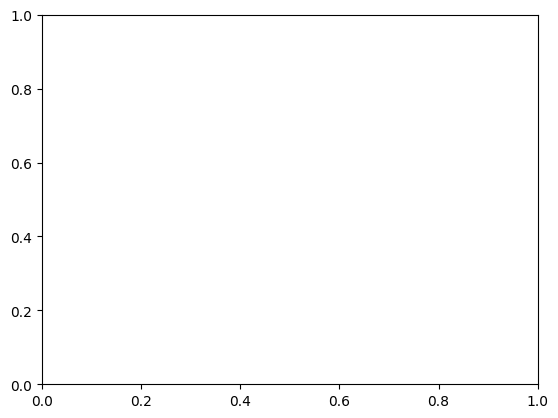

In [ ]:
order = [] 
eg_time = []
mo_time = []
delta = 3600.

for k in results[delta]:
    order.append(k)
    eg_time.append(results[delta][k]['lift_event_graph_time'])
    mo_time.append(results[delta][k]['mo_time']-results[delta][k]['lift_event_graph_time'])
sns.lineplot(x=order, y=eg_time, label='event graph')
sns.lineplot(x=order, y=mo_time, label='order lifting')